In [57]:
!pip install pytrends

**Installing necessary libraries**

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pytrends
import plotly.express as px
from pytrends.request import TrendReq
import time


# **setup for pytrends library**

In [68]:
pytrends = TrendReq(hl='en-US', tz=360)
keywords="artificial intelligence"

In [69]:
pytrends.build_payload(kw_list=[keywords],cat=0,timeframe='today 12-m',geo='',gprop='')

In [70]:
time.sleep(5)  # Wait for 5 seconds (adjust as needed)

# Fetch and process region data
region_data = pytrends.interest_by_region()
region_data = region_data.sort_values(by=keywords, ascending=False)
region_data=region_data.head(15)

# **TOP 15 Countries with user given keyword**

<ipython-input-71-64e5dd796edf>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




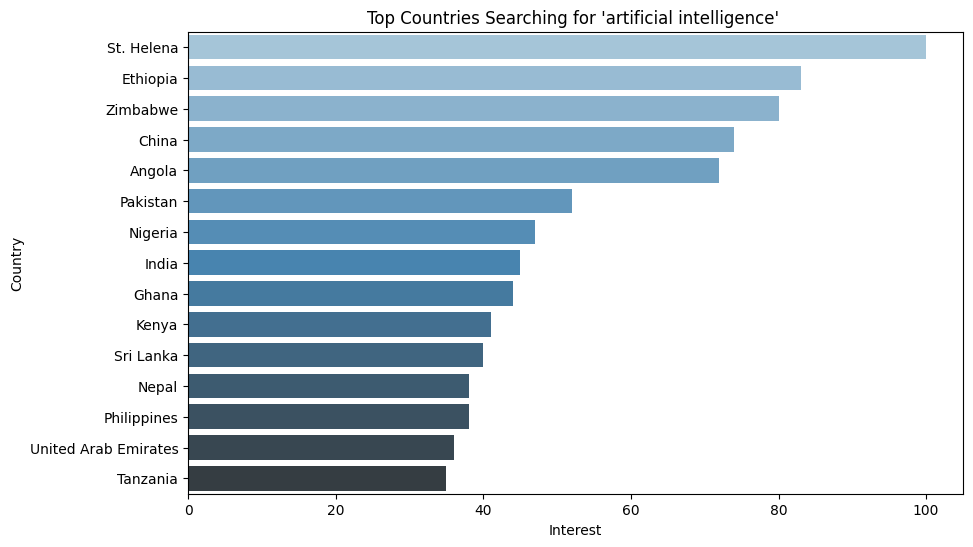

In [71]:
plt.figure(figsize=(10, 6))
sns.barplot(y=region_data.index, x=region_data[keywords],palette="Blues_d")
plt.xlabel('Interest')
plt.ylabel('Country')
plt.title(f"Top Countries Searching for '{keywords}' ")
plt.show()


# **Showcasing World Map**

In [72]:
# WORLD MAP

# Reset the index and rename the index column to 'geoName'
region_data = region_data.reset_index()

fig=px.choropleth(region_data,
                  locations='geoName', # Use the correctly named 'geoName' column for locations
                  locationmode='country names',
                  color=keywords,
                  title=f"Search Interest for '{keywords}' by country",
                  color_continuous_scale='Reds')
fig.show()

# **Interest Over time of last one year for user given keyword**

In [73]:
time_df=pytrends.interest_over_time()

/usr/local/lib/python3.11/dist-packages/pytrends/request.py:260: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



Text(0.5, 1.0, "Interest Over Time for 'artificial intelligence'")

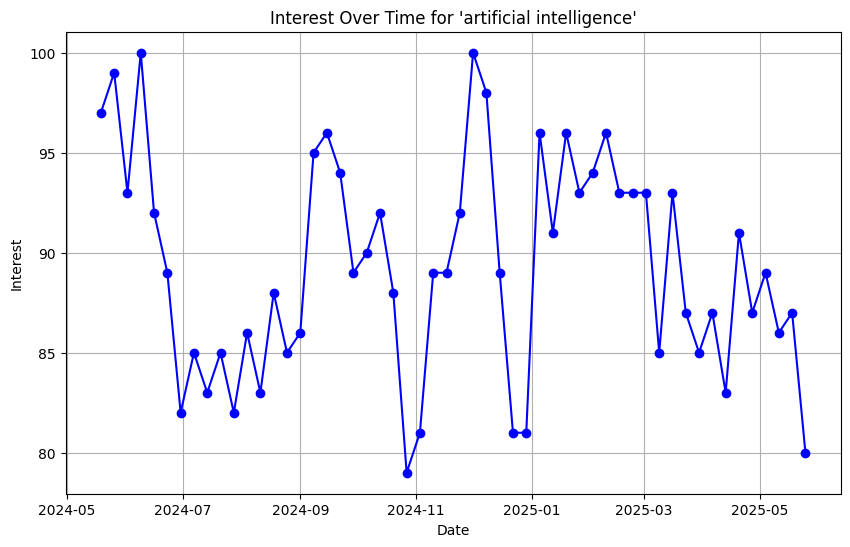

In [74]:
plt.figure(figsize=(10, 6))
plt.plot(time_df.index, time_df[keywords], marker='o', linestyle='-', color='b')
plt.xlabel('Date')
plt.ylabel('Interest')
plt.grid(True)
plt.title(f"Interest Over Time for '{keywords}'")

# **Comparison between different keywords**

In [75]:
kw_list=['cloud computing','machine learning','deep learning','data science','artificial intelligence']
pytrends.build_payload(kw_list,cat=0,timeframe='today 12-m',geo='',gprop='')

/usr/local/lib/python3.11/dist-packages/pytrends/request.py:260: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



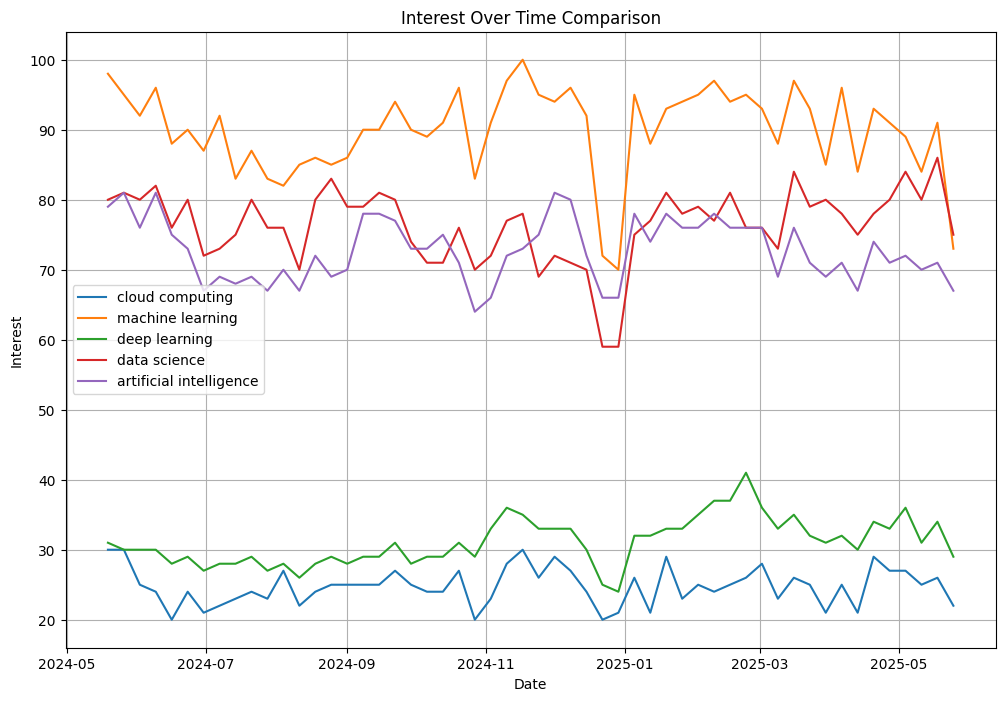

In [77]:
compare_df=pytrends.interest_over_time()
plt.figure(figsize=(12, 8))
for keyword in kw_list:
    plt.plot(compare_df.index, compare_df[keyword], linestyle='-', label=keyword)
plt.title('Interest Over Time Comparison')
plt.xlabel('Date')
plt.ylabel('Interest')
plt.legend()
plt.grid(True)
plt.show()

# **Thank You**